Are there noticeable patterns or advantages in having dual types compared to single-types Pokémon?

This analysis aims to compare the attributes of dual-type Pokémon against single-type Pokémon. The code classifies Pokémon into 'Single-Type' or 'Dual-Type' based on the presence or absence of a secondary type (Type 2). It then calculates average statistics (like HP, Attack, Defense, etc.) for each category and visualizes these averages using bar plots to directly compare single-type and dual-type Pokémon across various attributes.

In [1]:
import pandas as pd
pokemon_df = pd.read_csv('Pokemon.csv')

In [2]:
pokemon_df['Type Count'] = pokemon_df['Type 2'].apply(lambda x: 'Dual-Type' if pd.notnull(x) else 'Single-Type')

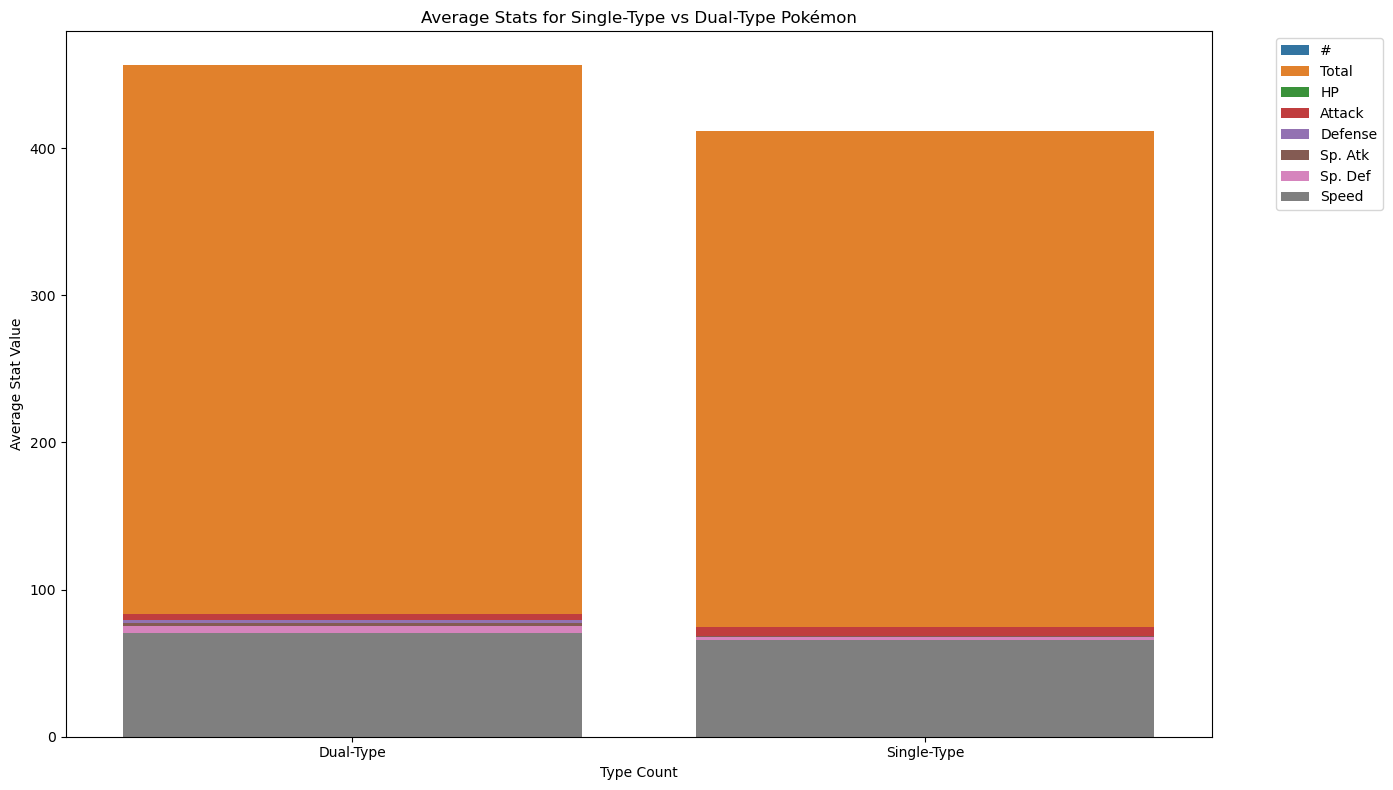

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classify Pokémon as 'Single-Type' or 'Dual-Type'
pokemon_df['Type Count'] = pokemon_df['Type 2'].apply(lambda x: 'Dual-Type' if pd.notnull(x) else 'Single-Type')

# Mean Calculation
numeric_cols = pokemon_df.select_dtypes(include=['float64', 'int64']).columns.drop('Generation')

# Calculate average stats for Single-Type and Dual-Type Pokémon
avg_stats_by_type = pokemon_df.groupby('Type Count')[numeric_cols].mean()

# Plot
plt.figure(figsize=(14, 8))
for stat in avg_stats_by_type.columns:
    sns.barplot(x=avg_stats_by_type.index, y=avg_stats_by_type[stat], label=stat)

plt.title('Average Stats for Single-Type vs Dual-Type Pokémon')
plt.ylabel('Average Stat Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This analysis provides insights into whether having a dual type confers any statistical advantages or distinct patterns compared to being a single type, across common combat-related attributes. The visualization helps in understanding how dual typing might affect a Pokémon's overall capabilities, potentially influencing strategies in competitive play or team composition in the Pokémon games. Dual-type Pokémon, on average, may possess a statistical advantage over single-type Pokémon. The higher total stat value suggests that they are designed to be stronger or more versatile, potentially offering a broader range of abilities and combat strategies. This could be an intentional design choice to balance the additional vulnerabilities that come with having a second type, such as being susceptible to more types of super-effective attacks.
The trend might reflect the game developers' design philosophy over the course of the Pokémon series. Incorporating dual types with higher stats could be a way to introduce complexity and depth to the game, encouraging players to think strategically about type advantages, team composition, and the specific roles each Pokémon can play in battle.

Are there specific types that are more likely to be associated with legendary Pokémon?

This analysis focuses on identifying if certain Pokémon types are more associated with Legendary status. The code calculates the proportion of Legendary Pokémon within each type, considering both primary (Type 1) and secondary (Type 2) types. These proportions were then visualized using a bar plot, ranking Pokémon types by the likelihood of being Legendary. This visualization sheds light on the distribution of Legendary Pokémon across different types, revealing which types are more commonly associated with Legendary status. The findings could influence players' perceptions of rarity and value for specific Pokémon types, highlighting the unique status of certain types in the context of Pokémon lore and gameplay mechanics.

/tmp/ipykernel_209/2706339118.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=legendary_proportions, y=legendary_proportions.index, palette="coolwarm")


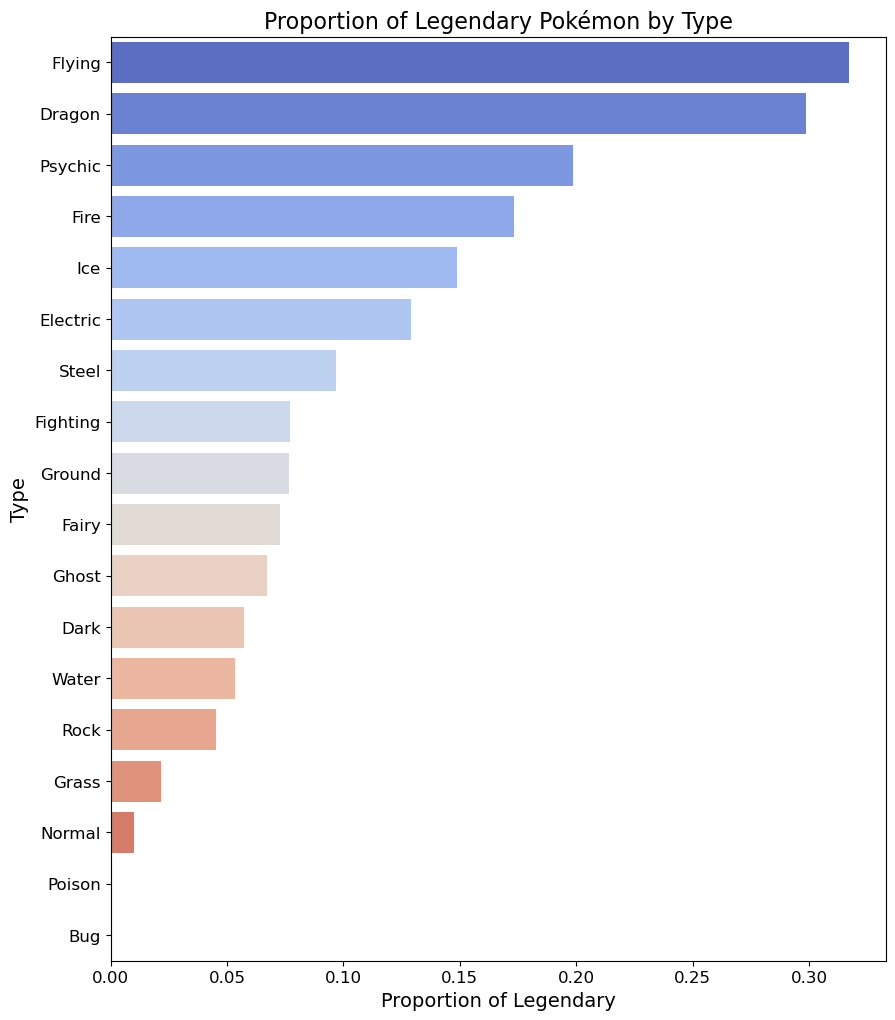

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokemon_df = pd.read_csv('Pokemon.csv')

# Identify Legendary Pokémon and calculate proportions per type
# Consider both Type 1 and Type 2
type_1_legendary = pokemon_df.groupby('Type 1')['Legendary'].value_counts(normalize=True).unstack().fillna(0)[True]
type_2_legendary = pokemon_df.groupby('Type 2')['Legendary'].value_counts(normalize=True).unstack().fillna(0)[True]
legendary_proportions = (type_1_legendary.add(type_2_legendary, fill_value=0) / 2).sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 12))  # Adjusted figure size for better readability
sns.barplot(x=legendary_proportions, y=legendary_proportions.index, palette="coolwarm")
plt.title('Proportion of Legendary Pokémon by Type', fontsize=16)
plt.xlabel('Proportion of Legendary', fontsize=14)
plt.ylabel('Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


The observation that Flying, Dragon, Psychic, Fire, and Ice types are among the top types associated with Legendary Pokémon, based on their proportions, offers several insights into the design and thematic elements of the Pokémon series:

Game Balance and Rarity: Legendary Pokémon are designed to be rare and exceptionally powerful, and their type distribution reflects this. By assigning these types to Legendary Pokémon, game developers can emphasize their rarity and special status within the game world. These types often have unique abilities or powerful moves that set them apart from more common types, adding to the strategic depth and challenge of acquiring and mastering these Pokémon.

Strategic Diversity in Gameplay: The prevalence of these types among Legendary Pokémon introduces a strategic diversity to the gameplay. Players might seek out Legendary Pokémon of these types to overcome specific challenges or to bolster their team's capabilities in competitive battles. The distinct advantages and weaknesses of each type encourage players to think carefully about team composition and battle strategies.

Aesthetic and Narrative Significance: Beyond gameplay mechanics, the choice of types for Legendary Pokémon contributes to the narrative and aesthetic richness of the Pokémon universe. Fire, Ice, Dragon, Psychic, and Flying types allow for visually striking designs and compelling backstories that enhance the lore of the Pokémon world. These types facilitate storytelling, enabling developers to craft intricate histories and personalities for Legendary Pokémon that players can uncover and engage with throughout their adventures.

How have the attributes of Pokémon evolved acquired across different generations?

This analysis examines how Pokémon attributes have evolved across generations. The code calculates the average of key attributes (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) for Pokémon in each generation and applies a moving average to smooth out fluctuations. A single plot overlaying the moving averages for all attributes across generations was created to provide a comprehensive view of the trends. This analysis offered a historical perspective on how the design and balancing of Pokémon attributes have changed over time, reflecting the series' evolution and the shifting focus in game design. The use of moving averages highlighted long-term trends, making it easier to observe the gradual shifts in emphasis on different attributes, which could suggest changes in gameplay strategy and the meta-game over the years.

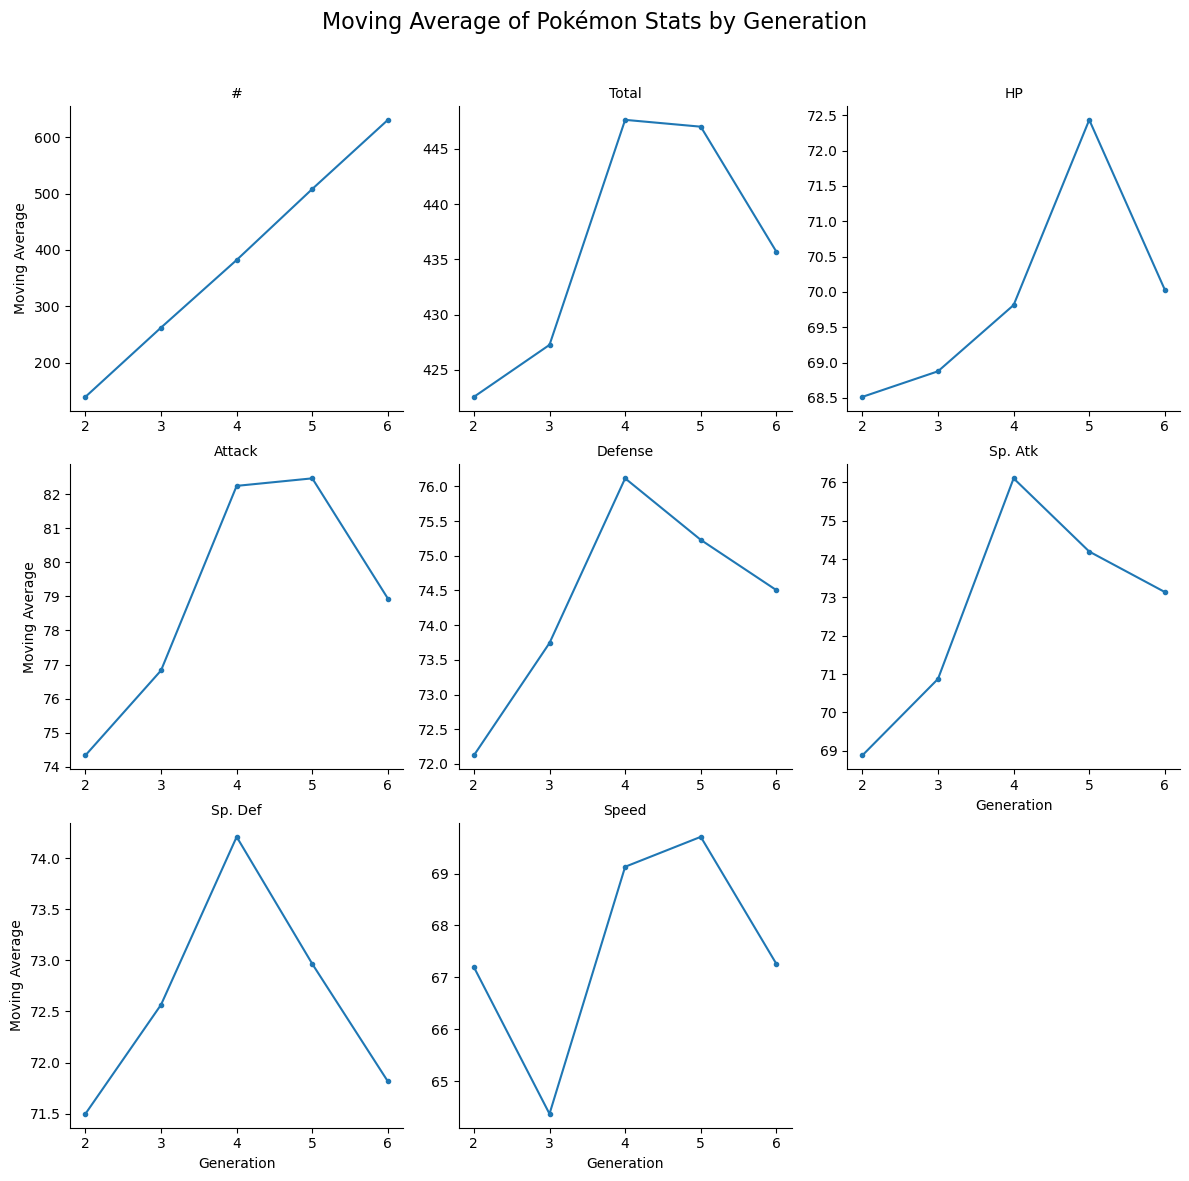

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_stats = pokemon_df.select_dtypes(include=[np.number]).drop(columns=['Generation'])

# Mean of numeric attributes for each generation
avg_stats_by_gen = pokemon_df.groupby('Generation')[numeric_stats.columns].mean().reset_index()

# Moving average with a window of 2 generations for smoothing
for stat in numeric_stats.columns:
    column_name = f'{stat}_MA'
    avg_stats_by_gen[column_name] = avg_stats_by_gen[stat].rolling(window=2).mean()

# Focusing on moving averages
melted_stats_ma = pd.melt(avg_stats_by_gen, id_vars=["Generation"], 
                          value_vars=[f'{stat}_MA' for stat in numeric_stats.columns], 
                          var_name='Stat', value_name='Moving Average')

melted_stats_ma['Stat'] = melted_stats_ma['Stat'].str.replace('_MA', '')

# Visualization
g = sns.FacetGrid(melted_stats_ma, col="Stat", col_wrap=3, height=4, sharex=False, sharey=False)
g = g.map(plt.plot, "Generation", "Moving Average", marker=".")
g.set_titles("{col_name}")
g.set_axis_labels("Generation", "Moving Average")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Moving Average of Pokémon Stats by Generation', fontsize=16)
plt.show()


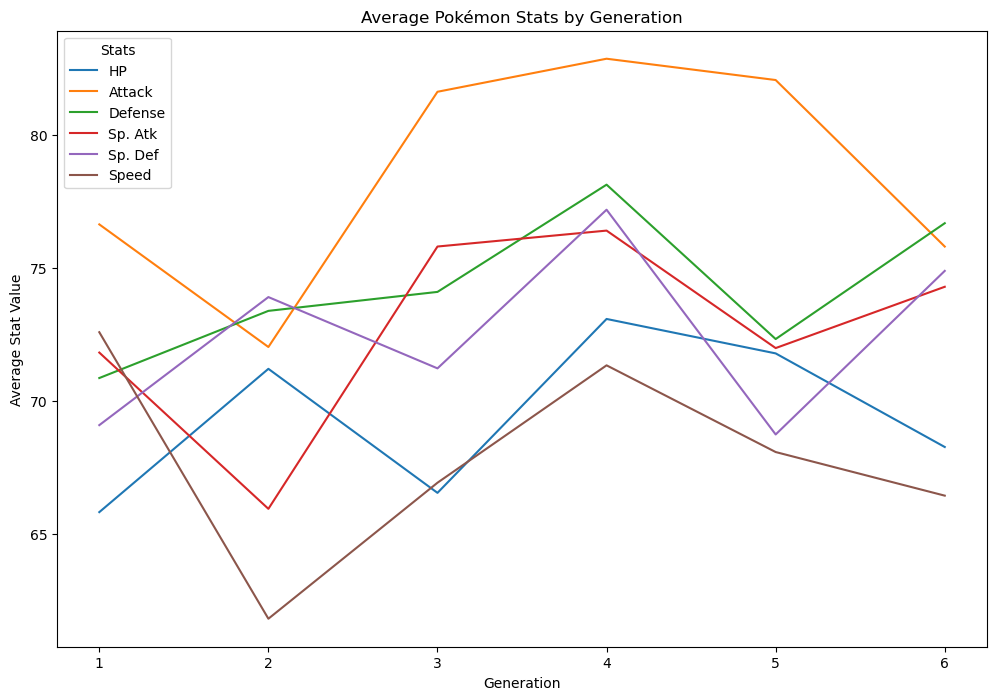

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert columns that should be numeric but are stored as objects
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'] 

for col in numeric_cols:
    pokemon_df[col] = pd.to_numeric(pokemon_df[col], errors='coerce')  # 'coerce' will set invalid parsing as NaN

# Mean of each attribute for each generation
avg_stats_by_gen = pokemon_df.groupby('Generation')[numeric_cols].mean()

# Single plot for comparison
plt.figure(figsize=(12, 8))

for col in numeric_cols:
    sns.lineplot(data=avg_stats_by_gen, x=avg_stats_by_gen.index, y=col, label=col)

plt.title('Average Pokémon Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Average Stat Value')
plt.legend(title='Stats')
plt.show()


Many fluctuations can be seen in the moving averages. This could indicate attempts by game developers to balance gameplay. A sudden rise or drop in the moving average of a particular stat reflects a response to perceived imbalances or player feedback from previous generations. However, attack seems to be the most prioritized stat across different generations while speed seems to be the least prioritized stat. The prominence of attack in the data indicates a consistent or growing emphasis on offensive capabilities over the generations. This could reflect the game developers' intention to make battles more dynamic and encourage strategies that revolve around offensive prowess. A possible reason for prioritizing Attack might be to facilitate a diverse range of battle strategies, making it advantageous for players to engage opponents aggressively.